In [2]:
import numpy as np
from keras import backend as K
from keras.models import load_model
from scipy.misc import imsave
from sys import argv
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

process on layer conv2d_1
process on filter 0
iteration: 19, current loss: 4.48503115
process on filter 1
iteration: 19, current loss: 4.5358715
process on filter 2
iteration: 19, current loss: 3.73855764
process on filter 3
iteration: 19, current loss: 6.4683838
process on filter 4
iteration: 19, current loss: 4.91262397
process on filter 5
iteration: 19, current loss: 3.81165742
process on filter 6
iteration: 19, current loss: 5.01403059
process on filter 7
iteration: 19, current loss: 2.82026318
process on filter 8
iteration: 19, current loss: 2.9982839405
process on filter 9
iteration: 0, current loss: 0.0
process on filter 10
iteration: 19, current loss: 3.93612671
process on filter 11
iteration: 19, current loss: 3.19420293
process on filter 12
iteration: 19, current loss: 5.37164973
process on filter 13
iteration: 19, current loss: 4.81452422
process on filter 14
iteration: 19, current loss: 3.78619059
process on filter 15
iteration: 19, current loss: 6.36825425
process on filte

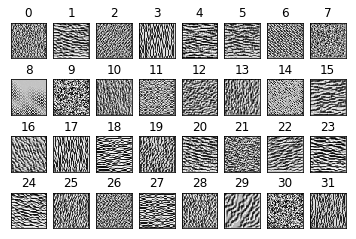

In [24]:
#def main():

model_name = 'fuck34_val.hdf5'
model = load_model(model_name)
layer_dict = dict([(layer.name, layer) for layer in model.layers])
input_img = model.input

layer_name = "conv2d_1"
print("process on layer " + layer_name)
filter_index = range(32)

# for loop
random_img = np.random.random((1, 1, 48, 48))
for f in filter_index:
    print("process on filter " + repr(f))
    layer_output = layer_dict[layer_name].output

    loss = K.mean(layer_output[:, f, :, :])
    grads = K.gradients(loss, input_img)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([input_img], [loss, grads])

    input_img_data = np.array(random_img)

    step = 1.
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        print("\riteration: " + repr(i) + ", current loss: " + repr(loss_value), end="", flush=True)
        if loss_value <= 0:
            break
    print("", flush=True)

    img = input_img_data[0].reshape(48, 48)
    img = deprocess_image(img)
    plt.subplot(4, 8, f+1)
    plt.title(repr(f))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(input_img_data[0].reshape(48, 48), cmap='gray')
    
print("save image...")
plt.savefig("%s_%s.png" % (model_name[:-3], layer_name))
plt.show()

save image...


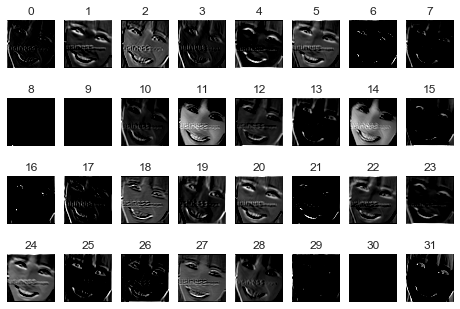

In [28]:
model_name = 'fuck34_val.hdf5'
model = load_model(model_name)
layer_dict = dict([(layer.name, layer) for layer in model.layers])
input_img = model.input

layer_name = "conv2d_1"
#print("process on layer " + layer_name)
filter_index = range(32)

idx = 3579
photo = x[idx].reshape(1, 1, 48, 48)


collect_layers = list()
collect_layers.append(K.function([input_img,K.learning_phase()],[layer_dict['conv2d_1'].output]))
for cnt, fn in enumerate(collect_layers):
    im = fn([photo,0])
    #fig = plt.figure(figsize=(14,8))
    nb_filter = im[0].shape[3]
    for f in filter_index:
        plt.subplot(4, 8, f+1)
        plt.title(repr(f))
        plt.xticks([], [])
        plt.yticks([], [])
        plt.imshow(im[0][0,f,:,:].reshape(48, 48), cmap='gray')

print("save image...")
plt.savefig("hw3_Q5_output")
plt.show()


In [25]:
from sys import argv
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from keras.models import load_model
from keras.utils import plot_model, np_utils
from sklearn.metrics import confusion_matrix
import keras.backend as K


In [26]:
x = []
y = []

n_row = 0
text = open('train.csv', 'r') 
row = csv.reader(text , delimiter=",")
for r in row:
	if n_row != 0:
		y.append(r[0])
		r[1] = np.array(r[1].split(' '))
		r[1] = np.reshape(r[1], (1, 48, 48))
		x.append(r[1])
	n_row = n_row+1
text.close()
x = np.array(x)
y = np.array(y)
x = x.astype(np.float64)
x = x/255
y = y.astype(np.int)
y = np_utils.to_categorical(y, num_classes=7)